In [3]:
import os
data_dir = 'afhq'

In [4]:
cat_data = os.path.join(data_dir, 'cat')
dog_data = os.path.join(data_dir, 'dog')
wild_data = os.path.join(data_dir, 'wild')

In [7]:
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'valid')

# os.mkdir(train_dir)
# os.mkdir(validation_dir)

In [17]:
cat_train = os.path.join(train_dir, 'cat')
dog_train = os.path.join(train_dir, 'dog')
wild_train = os.path.join(train_dir, 'wild')


cat_valid = os.path.join(validation_dir, 'cat')
dog_valid = os.path.join(validation_dir, 'dog')
wild_valid = os.path.join(validation_dir, 'wild')

In [18]:
from sklearn.model_selection import train_test_split

latih_cat, val_cat = train_test_split(os.listdir(cat_data), test_size=0.20)
latih_dog, val_dog = train_test_split(os.listdir(dog_data), test_size=0.20)
latih_wild, val_wild = train_test_split(os.listdir(wild_data), test_size=0.20)

In [19]:
# import shutil

# for file in latih_cat:
#   shutil.copy(os.path.join(cat_data, file), os.path.join(cat_train, file))
# for file in latih_dog:
#   shutil.copy(os.path.join(dog_data, file), os.path.join(dog_train, file))
# for file in latih_wild:
#   shutil.copy(os.path.join(wild_data, file), os.path.join(wild_train, file))

# for file in val_cat:
#   shutil.copy(os.path.join(cat_data, file), os.path.join(cat_valid, file))
# for file in val_dog:
#   shutil.copy(os.path.join(dog_data, file), os.path.join(dog_valid, file))
# for file in val_wild:
#   shutil.copy(os.path.join(wild_data, file), os.path.join(wild_valid, file))

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1/.255
                                  )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode = "categorical")
valid_generator = train_datagen.flow_from_directory(validation_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode = "categorical")

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [27]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D,BatchNormalization

In [47]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.8 and logs.get('val_accuracy')>0.8):
            print("\nAkurasi telah mencapai >80%!")
            self.model.stop_training = True
callbacks = myCallback()

In [48]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(112, kernel_size = (3,3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(72, kernel_size = (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation= 'softmax')
])


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 112)     3136      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 112)     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 72)      72648     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 72)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 52, 52, 64)        41536     
_________________________________________________________________
batch_normalization_6 (Batch (None, 52, 52, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 26, 26, 64)       

In [50]:
optimizer = tf.optimizers.RMSprop(learning_rate = 0.00001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [51]:
history = model.fit(
    train_generator,
    epochs = 25,
    validation_data = valid_generator,
    callbacks = [callbacks]
)

Epoch 1/25
38/38 [==============================] - 165s 4s/step - loss: 1.2546 - accuracy: 0.3558 - val_loss: 1.2744 - val_accuracy: 0.3633
Epoch 2/25
38/38 [==============================] - 159s 4s/step - loss: 1.1179 - accuracy: 0.4425 - val_loss: 1.1485 - val_accuracy: 0.3867
Epoch 3/25
38/38 [==============================] - 160s 4s/step - loss: 1.0294 - accuracy: 0.5108 - val_loss: 1.0782 - val_accuracy: 0.4267
Epoch 4/25
38/38 [==============================] - 159s 4s/step - loss: 0.9453 - accuracy: 0.5500 - val_loss: 0.9650 - val_accuracy: 0.5033
Epoch 5/25
38/38 [==============================] - 165s 4s/step - loss: 0.9065 - accuracy: 0.5742 - val_loss: 0.8885 - val_accuracy: 0.5767
Epoch 6/25
38/38 [==============================] - 156s 4s/step - loss: 0.8314 - accuracy: 0.6475 - val_loss: 0.8788 - val_accuracy: 0.5800
Epoch 7/25
38/38 [==============================] - 156s 4s/step - loss: 0.7875 - accuracy: 0.6542 - val_loss: 0.7668 - val_accuracy: 0.6733
Epoch 8/25
38

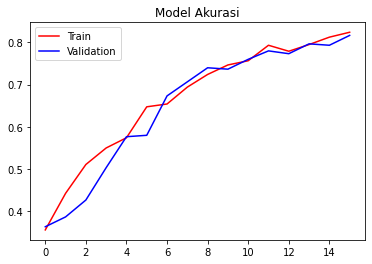

<Figure size 432x288 with 0 Axes>

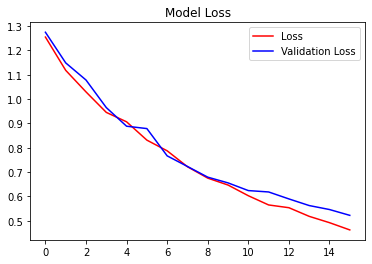

<Figure size 432x288 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt

akurasi = history.history['accuracy']
validation = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, akurasi, 'r', label='Train')
plt.plot(epochs, validation, 'b', label='Validation')
plt.title('Model Akurasi')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [59]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\ASUS-K~1\AppData\Local\Temp\tmp0o5jtkvw\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS-K~1\AppData\Local\Temp\tmp0o5jtkvw\assets


In [58]:
with tf.io.gfile.GFile('dogcatwild.tflite', 'wb') as f:
  f.write(tflite)

In [ ]:
Nama : Muhammad Dhafi Alfaridzi
SIB_ID = M315x0844
SIB_group = M07